<a href="https://colab.research.google.com/github/ArjavMehta01/Truist-Credit_Risk_SAS/blob/Nishang/CUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdate


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
cur = pd.read_csv('/content/drive/My Drive/summer project/Copy of train_CUR.csv')
#de['Act_date']= pd.to_datetime(de['Act_date'],format= '%m/%d/%y') 



In [43]:
def flag(state):
  if state == 'PPY':
    return '-1'
  elif state == 'CUR':
    return '0'
  elif state == 'DEL':
    return '1'
  else:
    return '2'

cur['flag'] = cur['Next_stat'].map(flag)

cur.head()

,Loan_id,Orig_amt,Orig_dte,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Act_date,Curr_rte,Act_upb,Loan_age,Next_stat,GDP,HS,UMP,PPI,HPI,yqtr,flag
0,100015887926,180000,10/01/09,36,35.0,800.0,N,R,PU,1,P,12/01/09,5.0,180000.00,1,CUR,14628.021,581,9.9,178.1,147.935,2009Q4,0
1,100015887926,180000,10/01/09,36,35.0,800.0,N,R,PU,1,P,03/01/10,5.0,180000.00,4,CUR,14721.350,636,9.9,183.3,145.857,2010Q1,0
2,100015887926,180000,10/01/09,36,35.0,800.0,N,R,PU,1,P,06/01/10,5.0,177971.30,7,CUR,14926.098,536,9.4,183.5,145.718,2010Q2,0
3,100015887926,180000,10/01/09,36,35.0,800.0,N,R,PU,1,P,09/01/10,5.0,177302.39,10,CUR,15079.917,594,9.5,184.9,143.013,2010Q3,0
4,100015887926,180000,10/01/09,36,35.0,800.0,N,R,PU,1,P,12/01/10,5.0,176625.08,13,CUR,15240.843,539,9.3,189.7,142.061,2010Q4,0


In [44]:
cur = cur.drop(['Loan_id','Orig_dte','Act_date','Next_stat','yqtr'],axis=1)

In [64]:
prime = cur.loc[cur['Cscore_b'] >= 670]
sub_prime = cur.loc[cur['Cscore_b'] < 670]


In [46]:
def dum(list, dataset):
  for col in list:
      x =pd.get_dummies(dataset[col] ,prefix = col)
      dataset = pd.concat([dataset,x], axis=1)
  return dataset
# plan a : using full Categorical
dumlist = ['Purpose', 'Prop_typ', 'Occ_stat','Fthb_flg','Num_unit']
prime = dum(dumlist,prime)

In [65]:
def dum(list, dataset):
  for col in list:
      x =pd.get_dummies(dataset[col] ,prefix = col)
      dataset = pd.concat([dataset,x], axis=1)
  return dataset
# plan a : using full Categorical
dumlist = ['Purpose', 'Prop_typ', 'Occ_stat','Fthb_flg','Num_unit']
sub_prime = dum(dumlist,sub_prime)

In [ ]:
# plan b&c: only purpose kept
dumlist = ['Purpose']
prime = dum(dumlist,prime)
prime = prime.drop(['Prop_typ', 'Occ_stat','Fthb_flg','Num_unit'],axis=1)
prime.head()

,Orig_amt,Oltv,Dti,Cscore_b,Purpose,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R
0,119000,71,41.0,789,R,4.500,105986.13,73,18219.405,1205,5.3,194.8,171.467,1,0,0,1
1,119000,71,41.0,789,R,4.500,105367.28,76,18344.713,1224,5.0,189.1,173.847,1,0,0,1
2,119000,71,41.0,789,R,4.500,104950.84,79,18350.825,1146,5.0,183.5,176.598,1,0,0,1
3,90000,67,47.0,696,R,6.375,87610.83,22,15240.843,543,9.4,186.6,142.526,0,0,0,1
4,90000,67,47.0,696,R,6.375,87031.41,28,15496.189,554,9.1,203.1,140.006,0,0,0,1


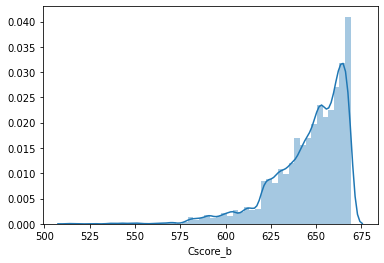

In [74]:
sns.distplot(sub_prime['Cscore_b'])

In [79]:
#SUB: group FICO
labels = ["{0} - {1}".format(i, i + 24) for i in range(550,675 , 25)]
sub_prime['FICO_group'] = pd.cut(sub_prime['Cscore_b'], range(550, 700, 25), right=False, labels=labels)
sub_prime.head()

,Orig_amt,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R,Prop_typ_CO,Prop_typ_CP,Prop_typ_MH,Prop_typ_PU,Prop_typ_SF,Occ_stat_I,Occ_stat_P,Occ_stat_S,Fthb_flg_N,Fthb_flg_Y,Num_unit_1,Num_unit_2,Num_unit_3,Num_unit_4,ratio_upb,FICO_group,FICO_group_550 - 574,FICO_group_575 - 599,FICO_group_600 - 624,FICO_group_625 - 649
492,233000,73,43.0,641.0,N,C,PU,1,P,4.5,233000.00,0,16358.863,976,7.9,201.5,145.507,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1.000000,625 - 649,0,0,0,1
493,233000,73,43.0,641.0,N,C,PU,1,P,4.5,233000.00,3,16569.591,1010,7.5,204.0,149.959,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1.000000,625 - 649,0,0,0,1
494,233000,73,43.0,641.0,N,C,PU,1,P,4.5,231141.67,6,16637.926,839,7.5,204.3,154.202,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0.992024,625 - 649,0,0,0,1
495,233000,73,43.0,641.0,N,C,PU,1,P,4.5,230196.73,9,16848.748,850,7.2,203.9,158.234,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0.987969,625 - 649,0,0,0,1
496,233000,73,43.0,641.0,N,C,PU,1,P,4.5,229241.13,12,17083.137,1002,6.7,202.0,160.994,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0.983868,625 - 649,0,0,0,1


In [ ]:
#plan c: group FICO
labels = ["{0} - {1}".format(i, i + 9) for i in range(670, 840, 10)]
prime['FICO_group'] = pd.cut(prime['Cscore_b'], range(670, 850, 10), right=False, labels=labels)
prime.head()

,Orig_amt,Oltv,Dti,Cscore_b,Purpose,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R,ratio_upb,FICO_group
0,119000,71,41.0,789,R,4.500,105986.13,73,18219.405,1205,5.3,194.8,171.467,1,0,0,1,0.890640,780 - 789
1,119000,71,41.0,789,R,4.500,105367.28,76,18344.713,1224,5.0,189.1,173.847,1,0,0,1,0.885439,780 - 789
2,119000,71,41.0,789,R,4.500,104950.84,79,18350.825,1146,5.0,183.5,176.598,1,0,0,1,0.881940,780 - 789
3,90000,67,47.0,696,R,6.375,87610.83,22,15240.843,543,9.4,186.6,142.526,0,0,0,1,0.973454,690 - 699
4,90000,67,47.0,696,R,6.375,87031.41,28,15496.189,554,9.1,203.1,140.006,0,0,0,1,0.967016,690 - 699


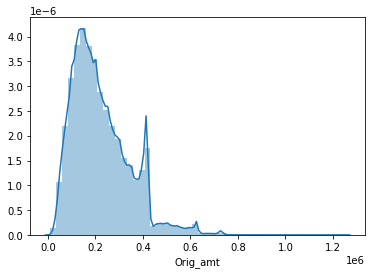

In [ ]:
sns.distplot(prime['Orig_amt'])

In [ ]:
#plan a: group Original UPB
labels = ["{0} - {1}".format(i, i + 99999) for i in range(0, 700001, 100000)]
prime['UPB_group'] = pd.cut(prime['Orig_amt'], range(0, 800001, 100000), right=False, labels=labels)
prime.head()

,Orig_amt,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R,Prop_typ_CO,Prop_typ_CP,Prop_typ_MH,Prop_typ_PU,Prop_typ_SF,Occ_stat_I,Occ_stat_P,Occ_stat_S,Fthb_flg_N,Fthb_flg_U,Fthb_flg_Y,Num_unit_1,Num_unit_2,Num_unit_3,Num_unit_4,FICO_group,UPB_group
0,180000,36,35.0,800.0,N,R,PU,1,P,5.0,180000.00,1,14628.021,581,9.9,178.1,147.935,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,790 - 819,100000 - 199999
1,180000,36,35.0,800.0,N,R,PU,1,P,5.0,180000.00,4,14721.350,636,9.9,183.3,145.857,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,790 - 819,100000 - 199999
2,180000,36,35.0,800.0,N,R,PU,1,P,5.0,177971.30,7,14926.098,536,9.4,183.5,145.718,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,790 - 819,100000 - 199999
3,180000,36,35.0,800.0,N,R,PU,1,P,5.0,177302.39,10,15079.917,594,9.5,184.9,143.013,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,790 - 819,100000 - 199999
4,180000,36,35.0,800.0,N,R,PU,1,P,5.0,176625.08,13,15240.843,539,9.3,189.7,142.061,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,790 - 819,100000 - 199999


In [ ]:
#plan b: group Original UPB
labels = ["{0} - {1}".format(i, i + 199999) for i in range(0, 600001, 200000)]
prime['UPB_group'] = pd.cut(prime['Orig_amt'], range(0, 800001, 200000), right=False, labels=labels)
prime.head()

,Orig_amt,Oltv,Dti,Cscore_b,Purpose,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R,UPB_group
0,119000,71,41.0,789,R,4.500,105986.13,73,18219.405,1205,5.3,194.8,171.467,1,0,0,1,0 - 200000
1,119000,71,41.0,789,R,4.500,105367.28,76,18344.713,1224,5.0,189.1,173.847,1,0,0,1,0 - 200000
2,119000,71,41.0,789,R,4.500,104950.84,79,18350.825,1146,5.0,183.5,176.598,1,0,0,1,0 - 200000
3,90000,67,47.0,696,R,6.375,87610.83,22,15240.843,543,9.4,186.6,142.526,0,0,0,1,0 - 200000
4,90000,67,47.0,696,R,6.375,87031.41,28,15496.189,554,9.1,203.1,140.006,0,0,0,1,0 - 200000


In [ ]:
# A
dumlist1 = ['FICO_group', 'UPB_group']
prime = dum(dumlist1,prime)


In [ ]:
# B 
dumlist1 = ['UPB_group']
prime = dum(dumlist1,prime)
prime.head()

,Orig_amt,Oltv,Dti,Cscore_b,Purpose,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R,UPB_group,UPB_group_0 - 200000,UPB_group_200000 - 400000,UPB_group_400000 - 600000
0,119000,71,41.0,789,R,4.500,105986.13,73,18219.405,1205,5.3,194.8,171.467,1,0,0,1,0 - 200000,1,0,0
1,119000,71,41.0,789,R,4.500,105367.28,76,18344.713,1224,5.0,189.1,173.847,1,0,0,1,0 - 200000,1,0,0
2,119000,71,41.0,789,R,4.500,104950.84,79,18350.825,1146,5.0,183.5,176.598,1,0,0,1,0 - 200000,1,0,0
3,90000,67,47.0,696,R,6.375,87610.83,22,15240.843,543,9.4,186.6,142.526,0,0,0,1,0 - 200000,1,0,0
4,90000,67,47.0,696,R,6.375,87031.41,28,15496.189,554,9.1,203.1,140.006,0,0,0,1,0 - 200000,1,0,0


In [77]:
# SUB
dumlist1 = ['FICO_group']
sub_prime = dum(dumlist1,sub_prime)
sub_prime.head()

,Orig_amt,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R,Prop_typ_CO,Prop_typ_CP,Prop_typ_MH,Prop_typ_PU,Prop_typ_SF,Occ_stat_I,Occ_stat_P,Occ_stat_S,Fthb_flg_N,Fthb_flg_Y,Num_unit_1,Num_unit_2,Num_unit_3,Num_unit_4,ratio_upb,FICO_group,FICO_group_550 - 574,FICO_group_575 - 599,FICO_group_600 - 624,FICO_group_625 - 649
492,233000,73,43.0,641.0,N,C,PU,1,P,4.5,233000.00,0,16358.863,976,7.9,201.5,145.507,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1.000000,625 - 649,0,0,0,1
493,233000,73,43.0,641.0,N,C,PU,1,P,4.5,233000.00,3,16569.591,1010,7.5,204.0,149.959,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1.000000,625 - 649,0,0,0,1
494,233000,73,43.0,641.0,N,C,PU,1,P,4.5,231141.67,6,16637.926,839,7.5,204.3,154.202,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0.992024,625 - 649,0,0,0,1
495,233000,73,43.0,641.0,N,C,PU,1,P,4.5,230196.73,9,16848.748,850,7.2,203.9,158.234,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0.987969,625 - 649,0,0,0,1
496,233000,73,43.0,641.0,N,C,PU,1,P,4.5,229241.13,12,17083.137,1002,6.7,202.0,160.994,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0.983868,625 - 649,0,0,0,1


In [ ]:
sub_prime['']

In [47]:
prime['ratio_upb'] = prime['Act_upb']/prime['Orig_amt']

In [66]:
sub_prime['ratio_upb'] = sub_prime['Act_upb']/sub_prime['Orig_amt']

In [ ]:
#A
prime = prime.drop(dumlist,axis=1)
prime = prime.drop(dumlist1, axis=1)
prime = prime.drop(['Cscore_b','Orig_amt','Act_upb'],axis=1)
prime.head()

,Oltv,Dti,Curr_rte,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R,Prop_typ_CO,Prop_typ_CP,Prop_typ_MH,Prop_typ_PU,Prop_typ_SF,Occ_stat_I,Occ_stat_P,Occ_stat_S,Fthb_flg_N,Fthb_flg_U,Fthb_flg_Y,Num_unit_1,Num_unit_2,Num_unit_3,Num_unit_4,FICO_group_670 - 699,FICO_group_700 - 729,FICO_group_730 - 759,FICO_group_760 - 789,FICO_group_790 - 819,UPB_group_0 - 99999,UPB_group_100000 - 199999,UPB_group_200000 - 299999,UPB_group_300000 - 399999,UPB_group_400000 - 499999,UPB_group_500000 - 599999,UPB_group_600000 - 699999,UPB_group_700000 - 799999,ratio_upb
0,36,35.0,5.0,1,14628.021,581,9.9,178.1,147.935,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1.000000
1,36,35.0,5.0,4,14721.350,636,9.9,183.3,145.857,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1.000000
2,36,35.0,5.0,7,14926.098,536,9.4,183.5,145.718,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0.988729
3,36,35.0,5.0,10,15079.917,594,9.5,184.9,143.013,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0.985013
4,36,35.0,5.0,13,15240.843,539,9.3,189.7,142.061,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0.981250


In [ ]:
#B 
prime = prime.drop(dumlist,axis=1) #dumlist = ['Purpose']
prime = prime.drop(dumlist1, axis=1) # dumlist1 = ['UPB_group']
prime = prime.drop(['Orig_amt','Act_upb','UMP','HS','PPI'],axis=1)
prime.head()

In [ ]:
#C
prime = prime.drop(dumlist,axis=1) #dumlist = ['Purpose']
prime = prime.drop(dumlist1, axis=1) # dumlist1 = ['FICO_group']
prime = prime.drop(['Act_upb','UMP','HS','PPI'],axis=1)
prime.head()

,Orig_amt,Oltv,Dti,Cscore_b,Curr_rte,Loan_age,GDP,HPI,flag,Purpose_C,Purpose_P,Purpose_R,ratio_upb,FICO_group_670 - 679,FICO_group_680 - 689,FICO_group_690 - 699,FICO_group_700 - 709,FICO_group_710 - 719,FICO_group_720 - 729,FICO_group_730 - 739,FICO_group_740 - 749,FICO_group_750 - 759,FICO_group_760 - 769,FICO_group_770 - 779,FICO_group_780 - 789,FICO_group_790 - 799,FICO_group_800 - 809,FICO_group_810 - 819,FICO_group_820 - 829,FICO_group_830 - 839,FICO_group_670 - 679,FICO_group_680 - 689,FICO_group_690 - 699,FICO_group_700 - 709,FICO_group_710 - 719,FICO_group_720 - 729,FICO_group_730 - 739,FICO_group_740 - 749,FICO_group_750 - 759,FICO_group_760 - 769,FICO_group_770 - 779,FICO_group_780 - 789,FICO_group_790 - 799,FICO_group_800 - 809,FICO_group_810 - 819,FICO_group_820 - 829,FICO_group_830 - 839
0,119000,71,41.0,789,4.500,73,18219.405,171.467,1,0,0,1,0.890640,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,119000,71,41.0,789,4.500,76,18344.713,173.847,1,0,0,1,0.885439,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,119000,71,41.0,789,4.500,79,18350.825,176.598,1,0,0,1,0.881940,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,90000,67,47.0,696,6.375,22,15240.843,142.526,0,0,0,1,0.973454,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,90000,67,47.0,696,6.375,28,15496.189,140.006,0,0,0,1,0.967016,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#A
#standardlized some of the Macro(equal scale & converge problem)

def stdmac(maclist, dataset):
  sampledes = dataset.describe()
  for mac in maclist:
    dataset[mac] = dataset[mac].map(lambda x: (x - sampledes[mac]['mean'])/sampledes[mac]['std'])
  return dataset

macrolist=['GDP','HS','PPI','HPI']
prime = stdmac(macrolist, prime)

In [ ]:
#B&C
#standardlized some of the Macro(equal scale & converge problem)

def stdmac(maclist, dataset):
  sampledes = dataset.describe()
  for mac in maclist:
    dataset[mac] = dataset[mac].map(lambda x: (x - sampledes[mac]['mean'])/sampledes[mac]['std'])
  return dataset

macrolist=['GDP','HPI']
prime = stdmac(macrolist, prime)
prime.head()


In [63]:
prime

,Orig_amt,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R,Prop_typ_CO,Prop_typ_CP,Prop_typ_MH,Prop_typ_PU,Prop_typ_SF,Occ_stat_I,Occ_stat_P,Occ_stat_S,Fthb_flg_N,Fthb_flg_Y,Num_unit_1,Num_unit_2,Num_unit_3,Num_unit_4,Purpose_C,Purpose_P,Purpose_R,Prop_typ_CO,Prop_typ_CP,Prop_typ_MH,Prop_typ_PU,Prop_typ_SF,Occ_stat_I,Occ_stat_P,Occ_stat_S,Fthb_flg_N,Fthb_flg_Y,Num_unit_1,Num_unit_2,Num_unit_3,Num_unit_4
492,233000,73,43.0,641.0,N,C,PU,1,P,4.500,233000.00,0,16358.863,976,7.9,201.5,145.507,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
493,233000,73,43.0,641.0,N,C,PU,1,P,4.500,233000.00,3,16569.591,1010,7.5,204.0,149.959,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
494,233000,73,43.0,641.0,N,C,PU,1,P,4.500,231141.67,6,16637.926,839,7.5,204.3,154.202,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
495,233000,73,43.0,641.0,N,C,PU,1,P,4.500,230196.73,9,16848.748,850,7.2,203.9,158.234,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
496,233000,73,43.0,641.0,N,C,PU,1,P,4.500,229241.13,12,17083.137,1002,6.7,202.0,160.994,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173696,264000,80,37.0,660.0,N,C,SF,1,P,5.875,257966.55,19,14559.543,560,7.3,170.9,153.623,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
2173697,264000,80,37.0,660.0,N,C,SF,1,P,5.875,256959.92,22,14394.547,505,8.7,168.1,148.666,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
2173698,264000,80,37.0,660.0,N,C,SF,1,P,5.875,255994.47,25,14352.850,585,9.5,174.1,148.095,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
2173699,264000,80,37.0,660.0,N,C,SF,1,P,5.875,254929.11,28,14420.312,585,9.8,174.1,148.025,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0


In [81]:
sub_prime.columns

Index(['Orig_amt', 'Oltv', 'Dti', 'Cscore_b', 'Fthb_flg', 'Purpose',
       'Prop_typ', 'Num_unit', 'Occ_stat', 'Curr_rte', 'Act_upb', 'Loan_age',
       'GDP', 'HS', 'UMP', 'PPI', 'HPI', 'flag', 'Purpose_C', 'Purpose_P',
       'Purpose_R', 'Prop_typ_CO', 'Prop_typ_CP', 'Prop_typ_MH', 'Prop_typ_PU',
       'Prop_typ_SF', 'Occ_stat_I', 'Occ_stat_P', 'Occ_stat_S', 'Fthb_flg_N',
       'Fthb_flg_Y', 'Num_unit_1', 'Num_unit_2', 'Num_unit_3', 'Num_unit_4',
       'ratio_upb', 'FICO_group', 'FICO_group_550 - 574',
       'FICO_group_575 - 599', 'FICO_group_600 - 624', 'FICO_group_625 - 649'],
      dtype='object')

In [83]:
#C SUB
#standardlized some of the Macro(equal scale & converge problem)

def stdmac(maclist, dataset):
  sampledes = dataset.describe()
  for mac in maclist:
    dataset[mac] = dataset[mac].map(lambda x: (x - sampledes[mac]['mean'])/sampledes[mac]['std'])
  return dataset

macrolist=['Orig_amt']
sub_prime = stdmac(macrolist, sub_prime)
sub_prime.head()


,Orig_amt,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R,Prop_typ_CO,Prop_typ_CP,Prop_typ_MH,Prop_typ_PU,Prop_typ_SF,Occ_stat_I,Occ_stat_P,Occ_stat_S,Fthb_flg_N,Fthb_flg_Y,Num_unit_1,Num_unit_2,Num_unit_3,Num_unit_4,ratio_upb,FICO_group,FICO_group_550 - 574,FICO_group_575 - 599,FICO_group_600 - 624,FICO_group_625 - 649
492,0.492257,73,43.0,641.0,N,C,PU,1,P,4.5,233000.00,0,16358.863,976,7.9,201.5,145.507,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1.000000,625 - 649,0,0,0,1
493,0.492257,73,43.0,641.0,N,C,PU,1,P,4.5,233000.00,3,16569.591,1010,7.5,204.0,149.959,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1.000000,625 - 649,0,0,0,1
494,0.492257,73,43.0,641.0,N,C,PU,1,P,4.5,231141.67,6,16637.926,839,7.5,204.3,154.202,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0.992024,625 - 649,0,0,0,1
495,0.492257,73,43.0,641.0,N,C,PU,1,P,4.5,230196.73,9,16848.748,850,7.2,203.9,158.234,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0.987969,625 - 649,0,0,0,1
496,0.492257,73,43.0,641.0,N,C,PU,1,P,4.5,229241.13,12,17083.137,1002,6.7,202.0,160.994,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0.983868,625 - 649,0,0,0,1


In [88]:
##C Sub
#Logistic Regression simple
sampleNext = sub_prime.dropna()
dy = sampleNext['flag']
dx = sampleNext[['Orig_amt','Oltv','Dti','Curr_rte', 'GDP','HPI','Purpose_C','Purpose_P','Purpose_R','FICO_group_550 - 574',
       'FICO_group_575 - 599', 'FICO_group_600 - 624', 'FICO_group_625 - 649','ratio_upb']]
import statsmodels.api as st
mdl = st.MNLogit(dy, dx)
mdl_fit = mdl.fit()
print (mdl_fit.summary())

         Current function value: 0.268672
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                          MNLogit Regression Results                          
Dep. Variable:                   flag   No. Observations:                76884
Model:                        MNLogit   Df Residuals:                    76842
Method:                           MLE   Df Model:                           39
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                 0.03349
Time:                        06:36:50   Log-Likelihood:                -20657.
converged:                      False   LL-Null:                       -21372.
Covariance Type:            nonrobust   LLR p-value:                3.472e-275
              flag=0       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Orig_amt                -0.2651      0.018    -14.447      0.000      -0.301      -0.229
Oltv                     0.0033      0.001      2.389      0.017       0.001       0.006
Dti         

In [86]:
##C-3 SUB
#Logistic Regression simple
sampleNext = sub_prime.dropna()
dy = sampleNext['flag']
dx = sampleNext[['Oltv','Dti','Cscore_b','Curr_rte', 'HPI','ratio_upb']]
import statsmodels.api as st
mdl = st.MNLogit(dy, dx)
mdl_fit = mdl.fit()
print (mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 0.271537
         Iterations 13
                          MNLogit Regression Results                          
Dep. Variable:                   flag   No. Observations:                76884
Model:                        MNLogit   Df Residuals:                    76866
Method:                           MLE   Df Model:                           15
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                 0.02318
Time:                        06:34:51   Log-Likelihood:                -20877.
converged:                       True   LL-Null:                       -21372.
Covariance Type:            nonrobust   LLR p-value:                1.238e-201
    flag=0       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Oltv          -0.0009      0.001     -0.731      0.465      -0.003       0.002
Dti            0.0005      0

In [58]:
##C-1
#Logistic Regression simple
sampleNext = prime.dropna()
dy = sampleNext['flag']
dx = sampleNext[['Orig_amt','Oltv','Dti','Cscore_b','Curr_rte', 'Loan_age','HPI','ratio_upb']]
import statsmodels.api as st
mdl = st.MNLogit(dy, dx)
mdl_fit = mdl.fit()
print (mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 0.167811
         Iterations 16
                          MNLogit Regression Results                          
Dep. Variable:                   flag   No. Observations:              2088106
Model:                        MNLogit   Df Residuals:                  2088079
Method:                           MLE   Df Model:                           24
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                 0.05139
Time:                        05:59:38   Log-Likelihood:            -3.5041e+05
converged:                       True   LL-Null:                   -3.6939e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
    flag=0       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Orig_amt   -2.435e-06   2.78e-08    -87.557      0.000   -2.49e-06   -2.38e-06
Oltv           0.0005      0

In [68]:
##C Sub
#Logistic Regression simple
sampleNext = sub_prime.dropna()
dy = sampleNext['flag']
dx = sampleNext[['Orig_amt','Oltv','Dti','Cscore_b','Curr_rte', 'Loan_age','GDP','HPI','Purpose_C','Purpose_P','Purpose_R','ratio_upb']]
import statsmodels.api as st
mdl = st.MNLogit(dy, dx)
mdl_fit = mdl.fit()
print (mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 0.268197
         Iterations 16
                          MNLogit Regression Results                          
Dep. Variable:                   flag   No. Observations:                77051
Model:                        MNLogit   Df Residuals:                    77015
Method:                           MLE   Df Model:                           33
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                 0.03565
Time:                        06:09:21   Log-Likelihood:                -20665.
converged:                       True   LL-Null:                       -21429.
Covariance Type:            nonrobust   LLR p-value:                1.547e-300
    flag=0       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Orig_amt   -2.582e-06   1.83e-07    -14.090      0.000   -2.94e-06   -2.22e-06
Oltv           0.0032      0

In [57]:
##C
#Logistic Regression simple
sampleNext = prime.dropna()
dy = sampleNext['flag']
dx = sampleNext[['Orig_amt','Oltv','Dti','Cscore_b','Curr_rte', 'Loan_age','GDP','HPI','Purpose_C','Purpose_P','Purpose_R','ratio_upb']]
import statsmodels.api as st
mdl = st.MNLogit(dy, dx)
mdl_fit = mdl.fit()
print (mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 0.167744
         Iterations 24
                          MNLogit Regression Results                          
Dep. Variable:                   flag   No. Observations:              2088106
Model:                        MNLogit   Df Residuals:                  2088070
Method:                           MLE   Df Model:                           33
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                 0.05176
Time:                        05:47:25   Log-Likelihood:            -3.5027e+05
converged:                       True   LL-Null:                   -3.6939e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
    flag=0       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Orig_amt   -2.402e-06   2.81e-08    -85.516      0.000   -2.46e-06   -2.35e-06
Oltv           0.0010      0

In [56]:
##D
#Logistic Regression simple  
sampleNext = prime.dropna()
dy = sampleNext['flag']
dx = sampleNext[['Oltv','Dti', 'Loan_age','GDP','Purpose_C','Purpose_P','Purpose_R','ratio_upb']]
import statsmodels.api as st
mdl = st.MNLogit(dy, dx)
mdl_fit = mdl.fit()
print (mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 0.172498
         Iterations 17
                          MNLogit Regression Results                          
Dep. Variable:                   flag   No. Observations:              2088106
Model:                        MNLogit   Df Residuals:                  2088082
Method:                           MLE   Df Model:                           21
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                 0.02489
Time:                        05:39:03   Log-Likelihood:            -3.6020e+05
converged:                       True   LL-Null:                   -3.6939e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
    flag=0       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Oltv          -0.0016      0.000     -6.628      0.000      -0.002      -0.001
Dti           -0.0007      0

In [53]:
prime = prime.drop(dumlist,axis=1)

In [ ]:
##A
#Logistic Regression simple
sampleNext = prime.dropna()
dy = sampleNext['flag']
dx = sampleNext.loc[:, sampleNext.columns != 'flag']
import statsmodels.api as st
mdl = st.MNLogit(dy, dx)
mdl_fit = mdl.fit()
print (mdl_fit.summary())

In [ ]:
drivers = ['Oltv','Cscore_b','Curr_rte','Loan_age','GDP','HPI']

In [ ]:
#Logistic Regression simple
sampleNext = sampleNext.dropna()
dy2 = sampleNext['flag']
dx2 = sampleNext[['Oltv','Cscore_b','Curr_rte','Loan_age','HPI']]
import statsmodels.api as st
mdl = st.MNLogit(dy2, dx2)
mdl_fit = mdl.fit()
print (mdl_fit.summary())

KeyError: ignored

In [ ]:
##B
#Logistic Regression simple
sampleNext = prime.dropna()
dy = sampleNext['flag']
dx = sampleNext.loc[:, sampleNext.columns != 'flag']
import statsmodels.api as st
mdl = st.MNLogit(dy, dx)
mdl_fit = mdl.fit()
print (mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 0.980970
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                   flag   No. Observations:                 8340
Model:                        MNLogit   Df Residuals:                     8298
Method:                           MLE   Df Model:                           39
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                 0.04429
Time:                        03:02:01   Log-Likelihood:                -8181.3
converged:                       True   LL-Null:                       -8560.4
Covariance Type:            nonrobust   LLR p-value:                4.408e-134
                   flag=0       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Oltv                          0.0023      0.004      0.562      0.574      -0.

In [ ]:
#Logistic Regression
sampleNext = sampleNext.dropna()
dy = sampleNext['flag']
dx = sampleNext.drop(['flag'],axis = 1)
import statsmodels.api as st
mdl = st.MNLogit(dy, dx)
mdl_fit = mdl.fit()
print(mdl_fit.summary())

         Current function value: 0.924879
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                          MNLogit Regression Results                          
Dep. Variable:                   flag   No. Observations:                 2212
Model:                        MNLogit   Df Residuals:                     2164
Method:                           MLE   Df Model:                           45
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                 0.07637
Time:                        12:18:32   Log-Likelihood:                -2045.8
converged:                      False   LL-Null:                       -2215.0
Covariance Type:            nonrobust   LLR p-value:                 1.322e-46
     flag=0       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Orig_amt     8.049e-07   5.55e-06      0.145      0.885   -1.01e-05    1.17e-05
Oltv            0.0121      0.006      2.152      0.031       0.001       0.023
Dti             0.0085      0.010      0.852    

In [ ]:
prime.columns

Index(['Orig_amt', 'Oltv', 'Dti', 'Cscore_b', 'Fthb_flg', 'Purpose',
       'Prop_typ', 'Num_unit', 'Occ_stat', 'Curr_rte', 'Act_upb', 'Loan_age',
       'GDP', 'HS', 'UMP', 'PPI', 'HPI', 'flag'],
      dtype='object')

In [ ]:
sampleNext = prime.loc[:,['Orig_amt', 'Oltv', 'Dti', 'Cscore_b', 'Fthb_flg', 'Purpose',
       'Prop_typ', 'Num_unit', 'Occ_stat', 'Curr_rte', 'Act_upb', 'Loan_age',
       'GDP', 'HS', 'UMP', 'PPI', 'HPI', 'flag']]
sampleNext['Orig_amt'] = pd.cut(sampleNext['Orig_amt'], 5)
sampleNext['Cscore_b'] = pd.cut(sampleNext['Cscore_b'], 5)


sampleNext.head()

,Orig_amt,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag
0,"(24295.0, 166000.0]",71,41.0,"(785.6, 798.4]",N,R,SF,1,P,4.500,105986.13,73,18219.405,1205,5.3,194.8,171.467,1
1,"(24295.0, 166000.0]",71,41.0,"(785.6, 798.4]",N,R,SF,1,P,4.500,105367.28,76,18344.713,1224,5.0,189.1,173.847,1
2,"(24295.0, 166000.0]",71,41.0,"(785.6, 798.4]",N,R,SF,1,P,4.500,104950.84,79,18350.825,1146,5.0,183.5,176.598,1
23,"(24295.0, 166000.0]",60,38.0,"(759.936, 772.8]",N,R,SF,1,P,5.000,79220.60,43,16257.151,847,7.8,204.4,142.908,0
27,"(166000.0, 307000.0]",90,42.0,"(772.8, 785.6]",N,P,CO,1,S,5.875,143959.09,97,18991.883,1267,4.7,188.2,185.790,0


In [ ]:
sampledes = sampleNext.describe()
#standardlized some of the Macro(equal scale & converge problem)
sampleNext['GDP'] = sampleNext['GDP'].map(lambda x: (x - sampledes['GDP']['mean'])/sampledes['GDP']['std'])
sampleNext['HS'] = sampleNext['HS'].map(lambda x: (x - sampledes['HS']['mean'])/sampledes['HS']['std'])

In [ ]:
sampleNext['HPI'] = sampleNext['HPI'].map(lambda x: (x - sampledes['HPI']['mean'])/sampledes['HPI']['std'])

In [ ]:
sampleNext['GDP'] = pd.cut(sampleNext['GDP'], 5)
#sampleNext['HS'] = pd.cut(sampleNext['HS'], 5)
#sampleNext['UMP'] = pd.cut(sampleNext['UMP'], 5)
sampleNext['HPI'] = pd.cut(sampleNext['HPI'], 5)

In [ ]:
sampleNext=sampleNext.drop([ 'Fthb_flg', 'Purpose', 'Num_unit', 'Occ_stat', 'Loan_age','PPI' ], axis=1)

In [ ]:
sampleNext=sampleNext.drop(['HS','UMP' ], axis=1)

In [ ]:
sampleNext=sampleNext.drop(['Act_upb' ], axis=1)

In [ ]:
sampleNext.columns

Index(['Orig_amt', 'Oltv', 'Dti', 'Cscore_b', 'Prop_typ', 'Curr_rte', 'GDP',
       'HPI', 'flag'],
      dtype='object')

In [ ]:

columns = ['Orig_amt', 'Cscore_b', 'Prop_typ']
for col in columns:
  dum = pd.get_dummies(sampleNext[col], prefix = col)
  sampleNext = pd.concat([sampleNext, dum], axis = 1)

sampleNext = sampleNext.drop(columns,axis = 1)


In [ ]:
sampleNext.head()

,Oltv,Dti,Curr_rte,GDP,HPI,flag,"Orig_amt_(24295.0, 166000.0]","Orig_amt_(166000.0, 307000.0]","Orig_amt_(307000.0, 448000.0]","Orig_amt_(448000.0, 589000.0]","Orig_amt_(589000.0, 730000.0]","Cscore_b_(759.936, 772.8]","Cscore_b_(772.8, 785.6]","Cscore_b_(785.6, 798.4]","Cscore_b_(798.4, 811.2]","Cscore_b_(811.2, 824.0]",Prop_typ_CO,Prop_typ_CP,Prop_typ_MH,Prop_typ_PU,Prop_typ_SF
0,71,41.0,4.500,0.059238,-0.095374,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,71,41.0,4.500,0.119369,0.004934,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,71,41.0,4.500,0.122302,0.120878,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
23,60,38.0,5.000,-0.882369,-1.299025,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
27,90,42.0,5.875,0.429920,0.508285,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
#Logistic Regression
sampleNext = sampleNext.dropna()
dy1 = sampleNext['flag']
dx1 = sampleNext.drop(['flag'],axis = 1)
import statsmodels.api as st
mdl = st.MNLogit(dy1, dx1)
mdl_fit = mdl.fit()
print (mdl_fit.summary())

         Current function value: 0.928532
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:4112: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                          MNLogit Regression Results                          
Dep. Variable:                   flag   No. Observations:                 2212
Model:                        MNLogit   Df Residuals:                     2158
Method:                           MLE   Df Model:                           51
Date:                Fri, 26 Jun 2020   Pseudo R-squ.:                 0.07273
Time:                        11:56:23   Log-Likelihood:                -2053.9
converged:                      False   LL-Null:                       -2215.0
Covariance Type:            nonrobust   LLR p-value:                 4.945e-41
                       flag=0       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Oltv                              0.0089      0.006      1.585      0.113      -0.002       0.020
Dti                               0.0066      0.010      0.662      0.508 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import ridge_regression
#dx = sampleNext.drop(['NLDS','Lumberprice','new housing','HPI','unemployment rate','Rental Vacancy Rate','Vacant Housing Units for Sale'],axis = 1)
dx = dx.astype('float32') #string-->float

meandx = pd.DataFrame(dx.mean()).T
# np.corrcoef(dx)
regressor = LogisticRegression(multi_class='multinomial', solver='saga',penalty='l1', max_iter=500)
regressor.fit(dx,dy)
#regressorcv = LogisticRegressionCV(cv = 5,multi_class='multinomial').fit(dx,dy)
regressor2 = sm.MNLogit(endog=dy,exog=dx)
regressor2result = regressor2.fit()
regressor2result.summary()

results_summary = regressor2result.summary()
results_as_html = results_summary.tables[1].as_html()
abc = pd.read_html(results_as_html, header = 0, index_col =0)[0]
abc.to_html('CUR_sub1.html')


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2195: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:2196: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]
/usr/local/lib/python3.6/dist-packages/statsmodels/base/optimizer.py:299: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):


Optimization terminated successfully.
         Current function value: nan
         Iterations 21


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
